In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('uid_score.csv')
a = []
for i in range(0, len(data)):
    x = data['product_id'][i].split('/')[1]
    a.append(x)
b = []
for i in range(0, len(data)):
    x =a[i].split('_')[-1]
    if x not in b:
        b.append(x)
c = []
for i in range(0, len(data)):
    x =a[i].split('_')[-1]
    c.append(x)


  

In [3]:
x = []
for i in range(0, len(b)):
    y = c.count(b[i])
    if y > 240:
        x.append(b[i])
x

['Blouse',
 'Jacket',
 'Tee',
 'Tank',
 'Cardigan',
 'Sweater',
 'Top',
 'Shorts',
 'Joggers',
 'Skirt',
 'Sweatpants',
 'Dress',
 'Romper',
 'Jumpsuit',
 'Blazer',
 'Hoodie',
 'Jeans',
 'Leggings',
 'Kimono']

In [7]:
data = pd.read_csv('uid_score.csv')
a = []
for i in range(0, len(data)):
    x = data['product_id'][i].split('/')[1]
    a.append(x)
data['item'] = a
b = []
for i in range(0, len(data)):
    x = data['item'][i].split('_')[-1]
    b.append(x)
data['item'] = b
typ = []
for i in range(0, len(data)):
    if data['item'][i] == 'Blouse':
        c = 1
        typ.append(c)
    elif data['item'][i] == 'Jacket':
        c = 2
        typ.append(c)
    elif data['item'][i] == 'Tee':
        c = 3
        typ.append(c)
    elif data['item'][i] == 'Cardigan':
        c = 4
        typ.append(c)
    elif data['item'][i] == 'Sweater':
        c = 5
        typ.append(c)
    elif data['item'][i] == 'Top':
        c = 6
        typ.append(c)
    elif data['item'][i] == 'Tank':
        c = 7
        typ.append(c)
    elif data['item'][i] == 'Shorts':
        c = 8
        typ.append(c)
    elif data['item'][i] == 'Joggers':
        c = 9
        typ.append(c)
    elif data['item'][i] == 'Sweatpants':
        c = 10
        typ.append(c)
    elif data['item'][i] == 'Dress':
        c = 11
        typ.append(c)
    elif data['item'][i] == 'Romper':
        c = 12
        typ.append(c)
    elif data['item'][i] == 'Jumpsuit':
        c = 13
        typ.append(c)
    elif data['item'][i] == 'Blazer':
        c = 14
        typ.append(c)
    elif data['item'][i] == 'Hoodie':
        c = 15
        typ.append(c)
    elif data['item'][i] == 'Skirt':
        c = 16
        typ.append(c)
    elif data['item'][i] == 'Leggings':
        c = 17
        typ.append(c)
    elif data['item'][i] == 'Jeans':
        c = 18
        typ.append(c)
    elif data['item'][i] == 'Coat':
        c = 19
        typ.append(c)
    elif data['item'][i] == 'Kimono':
        c = 20
        typ.append(c)
    else:
        c = 21
        typ.append(c)
data['type'] = typ
d = []
for i in range(0, len(data)):
    x = data['product_id'][i].split('/')[2]
    d.append(x)
data['product_id'] = d
for i in range(0,len(data)):
    if data['item'][i] == 'Kimono':
        data['item'][i] == 'Robe'
    else:
        data['item'][i]
data.head()

,user_id,product_id,rating,item,type
0,1,img_00000068,4,Blouse,1
1,1,img_00000030,3,Blouse,1
2,1,img_00000046,5,Jacket,2
3,1,img_00000048,4,Tee,3
4,1,img_00000054,3,Tee,3


In [8]:
data = data.query('type != 21') 
data.head()

,user_id,product_id,rating,item,type
0,1,img_00000068,4,Blouse,1
1,1,img_00000030,3,Blouse,1
2,1,img_00000046,5,Jacket,2
3,1,img_00000048,4,Tee,3
4,1,img_00000054,3,Tee,3


In [14]:
t_data = data.query('type == [1, 2, 3, 4, 5, 6, 7, 14, 15, 19]')
u_data = data.query('type == [8, 9, 10, 16, 17, 18]')
o_data = data.query('type == [11, 12, 13, 20]')

In [15]:
t_data.head()

,user_id,product_id,rating,item,type
0,1,img_00000068,4,Blouse,1
1,1,img_00000030,3,Blouse,1
2,1,img_00000046,5,Jacket,2
3,1,img_00000048,4,Tee,3
4,1,img_00000054,3,Tee,3


In [16]:
u_data.head()

,user_id,product_id,rating,item,type
41,1,img_00000033,3,Shorts,8
42,1,img_00000050,4,Joggers,9
43,1,img_00000045,5,Skirt,16
44,1,img_00000058,3,Shorts,8
45,1,img_00000049,3,Shorts,8


In [17]:
o_data.head()

,user_id,product_id,rating,item,type
49,1,img_00000039,5,Dress,11
50,1,img_00000058,5,Dress,11
51,1,img_00000006,3,Dress,11
52,1,img_00000012,3,Romper,12
53,1,img_00000073,4,Jumpsuit,13


In [18]:
len(t_data)

11684

In [19]:
len(u_data)

4471

In [20]:
len(o_data)

7480

In [22]:
user_product_rating = data.pivot_table('rating', index = 'product_id', columns='item').fillna(0)
user_product_rating.head()

item,Blazer,Blouse,Cardigan,Coat,Dress,Hoodie,Jacket,Jeans,Joggers,Jumpsuit,Kimono,Leggings,Romper,Shorts,Skirt,Sweater,Sweatpants,Tank,Tee,Top
product_id,,,,,,,,,,,,,,,,,,,,
img_00000001,4.333333,4.000000,4.368421,4.000000,3.925000,4.285714,3.833333,3.928571,3.900000,3.764706,4.666667,4.125000,3.941176,4.115385,3.800000,3.750000,4.285714,4.045455,3.853933,4.214286
img_00000002,4.375000,4.272727,3.800000,4.000000,3.955752,4.200000,4.111111,4.111111,4.125000,4.117647,4.111111,3.900000,4.187500,4.021277,4.080000,4.333333,4.000000,4.178571,3.870130,4.185185
img_00000003,3.909091,4.111111,4.153846,3.000000,3.901786,3.888889,4.125000,4.000000,4.250000,4.000000,4.357143,3.909091,3.888889,3.918919,3.842105,3.960000,3.888889,3.926829,4.000000,3.783784
img_00000004,4.000000,4.200000,4.000000,4.333333,4.131148,4.000000,3.909091,3.812500,4.555556,4.266667,4.066667,3.777778,4.142857,3.866667,3.894737,3.842105,4.400000,3.852941,4.162791,4.086957
img_00000005,3.777778,4.217391,3.952381,4.166667,4.027778,3.727273,4.250000,4.000000,4.500000,3.846154,4.000000,3.909091,4.096774,4.170732,3.818182,4.050000,4.142857,3.806452,4.060241,4.052632


In [23]:
product_user_rating = user_product_rating.values.T
product_user_rating.shape

(20, 157)

In [25]:
SVD = TruncatedSVD(n_components=3)
matrix = SVD.fit_transform(product_user_rating)
matrix.shape

(20, 3)

In [26]:
corr = np.corrcoef(matrix)
corr.shape

(20, 20)

<AxesSubplot:>

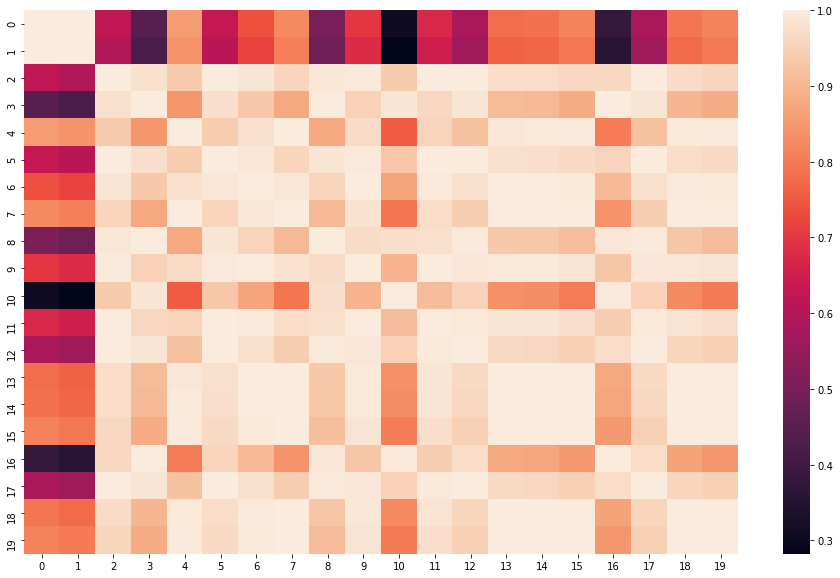

In [27]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr)

In [29]:
item_name = user_product_rating.columns
item_list = list(item_name)
coffey_hands = item_list.index("Cardigan")
corr_coffey_hands  = corr[coffey_hands]
# list(item_name[(corr_coffey_hands >= 0.95)])[:50]
list(item_name[(corr_coffey_hands >= 0.95)])[:50]

['Cardigan',
 'Coat',
 'Hoodie',
 'Jacket',
 'Jeans',
 'Joggers',
 'Jumpsuit',
 'Leggings',
 'Romper',
 'Shorts',
 'Skirt',
 'Sweater',
 'Sweatpants',
 'Tank',
 'Tee',
 'Top']

In [46]:
user_product_rating1 = u_data.pivot_table('rating', index = 'product_id', columns='item').fillna(0)
user_product_rating1.head()

item,Jeans,Joggers,Leggings,Shorts,Skirt,Sweatpants
product_id,,,,,,
img_00000001,3.928571,3.900000,4.125000,4.115385,3.800000,4.285714
img_00000002,4.111111,4.125000,3.900000,4.021277,4.080000,4.000000
img_00000003,4.000000,4.250000,3.909091,3.918919,3.842105,3.888889
img_00000004,3.812500,4.555556,3.777778,3.866667,3.894737,4.400000
img_00000005,4.000000,4.500000,3.909091,4.170732,3.818182,4.142857


In [48]:
product_user_rating1 = user_product_rating1.values.T
product_user_rating1.shape

(6, 87)

In [53]:
SVD = TruncatedSVD(n_components=9)
matrix1 = SVD.fit_transform(product_user_rating1)
matrix1.shape

(6, 6)

In [54]:
corr1 = np.corrcoef(matrix1)
corr1.shape

(6, 6)

<AxesSubplot:>

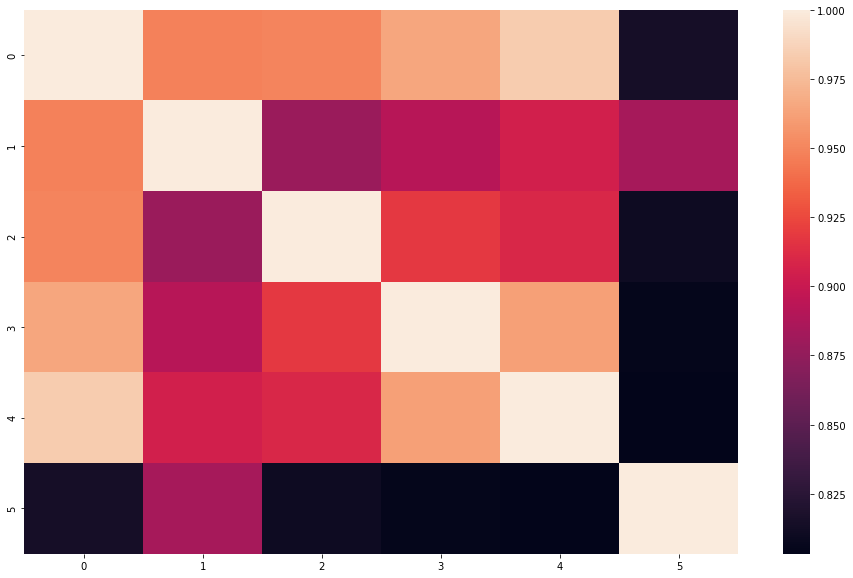

In [55]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr1)

In [56]:
item_name = user_product_rating1.columns
item_list = list(item_name)
coffey_hands = item_list.index("Jeans")
corr1_coffey_hands  = corr1[coffey_hands]
# list(item_name[(corr_coffey_hands >= 0.95)])[:50]
list(item_name[(corr1_coffey_hands >= 0.95)])[:50]

['Jeans', 'Shorts', 'Skirt']

In [57]:
user_product_rating2 = t_data.pivot_table('rating', index = 'product_id', columns='item').fillna(0)
user_product_rating2.head()

item,Blazer,Blouse,Cardigan,Coat,Hoodie,Jacket,Sweater,Tank,Tee,Top
product_id,,,,,,,,,,
img_00000001,4.333333,4.000000,4.368421,4.000000,4.285714,3.833333,3.750000,4.045455,3.853933,4.214286
img_00000002,4.375000,4.272727,3.800000,4.000000,4.200000,4.111111,4.333333,4.178571,3.870130,4.185185
img_00000003,3.909091,4.111111,4.153846,3.000000,3.888889,4.125000,3.960000,3.926829,4.000000,3.783784
img_00000004,4.000000,4.200000,4.000000,4.333333,4.000000,3.909091,3.842105,3.852941,4.162791,4.086957
img_00000005,3.777778,4.217391,3.952381,4.166667,3.727273,4.250000,4.050000,3.806452,4.060241,4.052632


In [58]:
product_user_rating2 = user_product_rating2.values.T
product_user_rating2.shape

(10, 157)

In [59]:
SVD = TruncatedSVD(n_components=7)
matrix2 = SVD.fit_transform(product_user_rating2)
matrix2.shape

(10, 7)

In [60]:
corr2 = np.corrcoef(matrix2)
corr2.shape

(10, 10)

<AxesSubplot:>

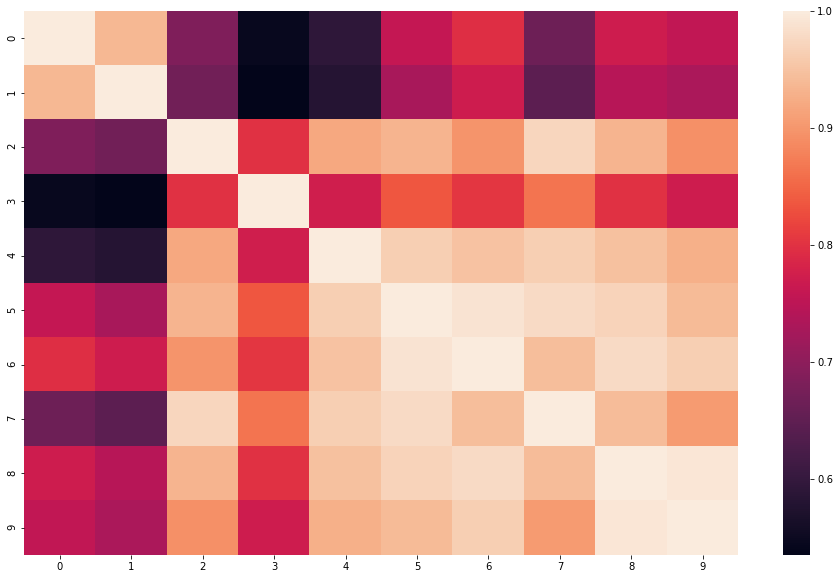

In [61]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

In [65]:
item_name = user_product_rating2.columns
item_list = list(item_name)
coffey_hands = item_list.index("Cardigan")
corr2_coffey_hands  = corr2[coffey_hands]
# list(item_name[(corr_coffey_hands >= 0.95)])[:50]
list(item_name[(corr2_coffey_hands >= 0.85)])[:50]

['Cardigan', 'Hoodie', 'Jacket', 'Sweater', 'Tank', 'Tee', 'Top']

In [72]:
from sklearn.metrics import mean_squared_error

In [66]:
def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적 곱으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [67]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    break_count = 0
       
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
   
    # SGD기법으로 P와 Q 매트릭스를 계속 업데이트. 
    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
       
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q

In [70]:
ratings_matrix = data.pivot_table('rating', index = 'user_id', columns = 'item')
ratings_matrix.head()

item,Blazer,Blouse,Cardigan,Coat,Dress,Hoodie,Jacket,Jeans,Joggers,Jumpsuit,Kimono,Leggings,Romper,Shorts,Skirt,Sweater,Sweatpants,Tank,Tee,Top
user_id,,,,,,,,,,,,,,,,,,,,
1,NaN,3.500000,4.000000,NaN,4.333333,NaN,5.000000,NaN,4.000000,4.000000,NaN,NaN,3.000000,3.000000,4.500000,5.00,5.000000,3.333333,3.766667,3.000000
2,3.666667,3.966527,3.932331,4.0,4.080435,3.6,4.055556,4.0,3.961538,4.088889,3.953488,4.166667,4.038462,3.986842,3.986301,4.24,NaN,3.878788,4.055556,4.027523
3,4.000000,4.250000,NaN,NaN,3.000000,4.0,4.018692,NaN,3.709677,4.000000,NaN,3.666667,NaN,4.150000,3.000000,NaN,3.923077,3.400000,4.000000,5.000000
4,NaN,4.000000,4.166667,NaN,4.000000,4.5,5.000000,NaN,4.133333,3.500000,NaN,3.826087,3.857143,4.120690,5.000000,3.00,4.000000,3.600000,3.941176,4.000000
5,NaN,NaN,NaN,NaN,4.000000,NaN,3.000000,NaN,NaN,4.000000,NaN,NaN,NaN,4.000000,3.000000,4.00,NaN,NaN,4.000000,3.500000


In [73]:
P, Q = matrix_factorization(ratings_matrix.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)
pred_matrix = np.dot(P, Q.T)

### iteration step :  0  rmse :  4.014868432747981
### iteration step :  10  rmse :  0.5270987455523353
### iteration step :  20  rmse :  0.46533558048537366
### iteration step :  30  rmse :  0.4458993176412827
### iteration step :  40  rmse :  0.42776437197786843
### iteration step :  50  rmse :  0.4004790580816188
### iteration step :  60  rmse :  0.3601296754632401
### iteration step :  70  rmse :  0.311044270989486
### iteration step :  80  rmse :  0.2629467384622098
### iteration step :  90  rmse :  0.2216597530639238
### iteration step :  100  rmse :  0.1879482918724851
### iteration step :  110  rmse :  0.16115697893806183
### iteration step :  120  rmse :  0.14025909036771514
### iteration step :  130  rmse :  0.12401585071166762
### iteration step :  140  rmse :  0.11126646801327436
### iteration step :  150  rmse :  0.10109333394200093
### iteration step :  160  rmse :  0.09282909025663622
### iteration step :  170  rmse :  0.08600334924536669
### iteration step :  180  rmse 

In [74]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

ratings_pred_matrix.head(3)

item,Blazer,Blouse,Cardigan,Coat,Dress,Hoodie,Jacket,Jeans,Joggers,Jumpsuit,Kimono,Leggings,Romper,Shorts,Skirt,Sweater,Sweatpants,Tank,Tee,Top
user_id,,,,,,,,,,,,,,,,,,,,
1,3.455869,3.581224,3.863930,3.400339,4.257879,3.655783,4.927833,4.131335,3.953065,3.981628,3.649738,4.575652,3.037558,3.088179,4.513746,4.977351,4.922082,3.359464,3.732758,3.041837
2,3.712157,3.964295,3.954991,3.969095,4.004634,3.652740,4.103298,4.055267,3.963946,4.123647,3.985986,4.116293,4.013910,4.028442,3.948293,4.217520,4.062068,3.858949,3.989610,3.942318
3,3.946468,4.220491,3.915048,4.189758,3.143692,3.977189,3.930923,3.753847,3.686200,3.951385,3.897614,3.720369,3.795148,4.118357,3.087880,3.299804,3.917758,3.387672,3.926747,4.963952


In [78]:
def get_unseen_items(ratings_matrix, user_id):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[user_id,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    items_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ item for item in items_list if item not in already_seen]
    
    return unseen_list

In [81]:
def recomm_by_userid(pred_df, user_id, unseen_list, top_n=5):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_items = pred_df.loc[user_id, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_items

In [82]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_items(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_items = recomm_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=5)

# 평점 데이타를 DataFrame으로 생성. 
recomm_items = pd.DataFrame(data=recomm_items.values,index=recomm_items.index,columns=['pred_score'])
recomm_items

,pred_score
item,
Leggings,4.154172
Joggers,4.085294
Kimono,4.070460
Jeans,3.922080
Cardigan,3.621818


In [84]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_items(ratings_matrix, 1)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_items = recomm_by_userid(ratings_pred_matrix, 1, unseen_list, top_n=5)

# 평점 데이타를 DataFrame으로 생성. 
recomm_items = pd.DataFrame(data=recomm_items.values,index=recomm_items.index,columns=['pred_score'])
recomm_items

,pred_score
item,
Leggings,4.575652
Jeans,4.131335
Hoodie,3.655783
Kimono,3.649738
Blazer,3.455869


In [85]:
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_items(ratings_matrix, 7)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_items = recomm_by_userid(ratings_pred_matrix, 7, unseen_list, top_n=5)

# 평점 데이타를 DataFrame으로 생성. 
recomm_items = pd.DataFrame(data=recomm_items.values,index=recomm_items.index,columns=['pred_score'])
recomm_items

,pred_score
item,
Kimono,4.390693
Romper,4.315008
Skirt,4.036833
Joggers,4.026782
Jeans,4.004673


In [58]:
data.head()

,user_id,product_id,rating,item,type
0,1,img_00000068,4,Blouse,1
1,1,img_00000030,3,Blouse,1
2,1,img_00000046,5,Jacket,2
3,1,img_00000048,4,Tee,3
4,1,img_00000054,3,Tee,3


In [179]:
data1 = n_data[['user_id', 'product_id', 'rating']]
data2 = n_data[['product_id', 'type', 'item']]
data1.head()

,user_id,product_id,rating
0,1,img_00000068,4
1,1,img_00000030,3
2,1,img_00000046,5
3,1,img_00000048,4
4,1,img_00000054,3


In [190]:
df_user_products_ratings = n_data.pivot_table(values = 'rating', index = 'user_id', columns='item').fillna(0)
df_user_products_ratings.head()

item,Blazer,Blouse,Cardigan,Coat,Dress,Hoodie,Jacket,Jeans,Joggers,Jumpsuit,...,Romper,Shorts,Skirt,Sweater,Sweatpants,Tank,Tee,Top,Trunks,Turtleneck
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,3.500000,4.000000,0.0,4.333333,0.0,5.000000,0.0,4.000000,4.000000,...,3.000000,3.000000,4.500000,5.00,5.000000,3.333333,3.766667,3.000000,0.0,0.0
2,3.666667,3.966527,3.932331,4.0,4.080435,3.6,4.055556,4.0,3.961538,4.088889,...,4.038462,3.986842,3.986301,4.24,0.000000,3.878788,4.055556,4.027523,0.0,0.0
3,4.000000,4.250000,0.000000,0.0,3.000000,4.0,4.018692,0.0,3.709677,4.000000,...,0.000000,4.150000,3.000000,0.00,3.923077,3.400000,4.000000,5.000000,0.0,0.0
4,0.000000,4.000000,4.166667,0.0,4.000000,4.5,5.000000,0.0,4.133333,3.500000,...,3.857143,4.120690,5.000000,3.00,4.000000,3.600000,3.941176,4.000000,0.0,0.0
5,0.000000,0.000000,0.000000,0.0,4.000000,0.0,3.000000,0.0,0.000000,4.000000,...,0.000000,4.000000,3.000000,4.00,0.000000,0.000000,4.000000,3.500000,0.0,0.0


In [191]:
# matrix는 pivot_table 값을 numpy matrix로 만든 것 
# matrix = df_user_movie_ratings.as_matrix()
matrix = df_user_products_ratings.values

# user_ratings_mean은 사용자의 평균 평점 
user_ratings_mean = np.mean(matrix, axis = 1)

# R_user_mean : 사용자-상품에 대해 사용자 평균 평점을 뺀 것.
matrix_user_mean = matrix - user_ratings_mean.reshape(-1, 1)
matrix

array([[0.        , 3.5       , 4.        , ..., 3.        , 0.        ,
        0.        ],
       [3.66666667, 3.9665272 , 3.93233083, ..., 4.02752294, 0.        ,
        0.        ],
       [4.        , 4.25      , 0.        , ..., 5.        , 0.        ,
        0.        ],
       ...,
       [3.94202899, 4.00611621, 4.02547771, ..., 3.95652174, 5.        ,
        4.        ],
       [0.        , 3.75      , 0.        , ..., 0.        , 5.        ,
        0.        ],
       [4.5       , 3.72727273, 3.75      , ..., 4.        , 0.        ,
        0.        ]])

In [192]:
matrix.shape

(50, 22)

In [193]:
user_ratings_mean.shape

(50,)

In [194]:
matrix_user_mean.shape

(50, 22)

In [195]:
pd.DataFrame(matrix_user_mean, columns = df_user_products_ratings.columns).head()

item,Blazer,Blouse,Cardigan,Coat,Dress,Hoodie,Jacket,Jeans,Joggers,Jumpsuit,...,Romper,Shorts,Skirt,Sweater,Sweatpants,Tank,Tee,Top,Trunks,Turtleneck
0,-2.519697,0.980303,1.480303,-2.519697,1.813636,-2.519697,2.480303,-2.519697,1.480303,1.480303,...,0.480303,0.480303,1.980303,2.480303,2.480303,0.813636,1.246970,0.480303,-2.519697,-2.519697
1,0.226414,0.526274,0.492078,0.559747,0.640182,0.159747,0.615302,0.559747,0.521285,0.648636,...,0.598208,0.546589,0.546048,0.799747,-3.440253,0.438535,0.615302,0.587270,-3.440253,-3.440253
2,1.540086,1.790086,-2.459914,-2.459914,0.540086,1.540086,1.558777,-2.459914,1.249763,1.540086,...,-2.459914,1.690086,0.540086,-2.459914,1.463163,0.940086,1.540086,2.540086,-2.459914,-2.459914
3,-2.938413,1.061587,1.228253,-2.938413,1.061587,1.561587,2.061587,-2.938413,1.194920,0.561587,...,0.918729,1.182276,2.061587,0.061587,1.061587,0.661587,1.002763,1.061587,-2.938413,-2.938413
4,-1.340909,-1.340909,-1.340909,-1.340909,2.659091,-1.340909,1.659091,-1.340909,-1.340909,2.659091,...,-1.340909,2.659091,1.659091,2.659091,-1.340909,-1.340909,2.659091,2.159091,-1.340909,-1.340909


In [196]:
# scipy에서 제공해주는 svd.  
# U 행렬, sigma 행렬, V 전치 행렬을 반환.

U, sigma, Vt = svds(matrix_user_mean, k = 3)
print(U.shape)
print(sigma.shape)
print(Vt.shape)

(50, 3)
(3,)
(3, 22)


In [197]:
sigma = np.diag(sigma)
sigma.shape

(3, 3)

In [198]:
# U, Sigma, Vt의 내적을 수행하면, 다시 원본 행렬로 복원이 된다. 
# 거기에 + 사용자 평균 rating을 적용한다. 
svd_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [199]:
df_svd_preds = pd.DataFrame(svd_user_predicted_ratings, columns = df_user_products_ratings.columns)
df_svd_preds.head()

item,Blazer,Blouse,Cardigan,Coat,Dress,Hoodie,Jacket,Jeans,Joggers,Jumpsuit,...,Romper,Shorts,Skirt,Sweater,Sweatpants,Tank,Tee,Top,Trunks,Turtleneck
0,3.116370,3.471128,2.632018,1.158185,3.871564,2.174249,3.667497,1.335978,2.055340,2.975581,...,2.476322,3.750764,3.156577,2.982459,2.061861,3.459664,4.031565,3.287225,-0.224013,-0.512005
1,3.909709,4.145853,3.843149,2.359165,4.150440,3.665861,4.103652,2.364205,3.719661,3.909881,...,3.500268,3.910549,4.229717,3.466056,3.219065,4.069579,4.427900,4.056919,0.957961,0.845758
2,2.888098,3.621475,3.003151,0.848305,3.530947,3.008681,3.132815,1.078538,2.828266,3.099049,...,2.325824,3.091261,3.505629,2.599400,1.982634,3.529699,3.996700,3.269367,-0.799373,-1.017244
3,3.258765,4.260948,3.719169,1.143617,3.897069,4.001512,3.344456,1.435625,3.751572,3.687169,...,2.725341,3.265429,4.217151,2.924126,2.417916,4.126560,4.545082,3.782553,-0.643427,-0.837378
4,1.705789,2.326016,0.630107,0.193254,3.383482,-0.067452,2.747288,0.800976,-0.676110,1.426212,...,0.948868,3.591958,1.105768,2.629301,0.522951,2.494104,3.175756,1.909922,0.019050,-0.538806


In [203]:
# already_rated, predictions = recommend_products(df_svd_preds, 330, df_products, df_ratings, 10)

# 4번 user에게 5의 rating이 높은 item을 추천.
already_rated, predictions = recommend_products(df_svd_preds, 4, n_data, 5)

AttributeError: 'int' object has no attribute 'user_id'

In [132]:
# 4번 user가 rating한 item 
already_rated.head(10)

,user_id,product_id,rating,type,item
0,4,img_00000077,5,1,Blouse
27463,4,img_00000017,5,3,Tee
27457,4,img_00000017,5,9,Shorts
27458,4,img_00000017,5,13,Dress
27459,4,img_00000017,5,14,Romper
27460,4,img_00000017,5,7,Tank
27461,4,img_00000017,5,13,Dress
27462,4,img_00000017,5,5,Sweater
27464,4,img_00000017,5,3,Tee
27506,4,img_00000017,5,4,Cardigan


In [133]:
# 유사한 item을 추천 (rating 순으로 출력)
predictions

,product_id,type,item,Predictions
1535,img_00000041,13,Dress,2.91144
1594,img_00000041,12,Cutoffs,2.91144
1601,img_00000041,5,Sweater,2.91144
1600,img_00000041,3,Tee,2.91144
1599,img_00000041,3,Tee,2.91144
